<img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2019

En este notebook aplicamos una red neuronal en Keras a un dataset de clasificación.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

<hr>

## Recordemos

Construcción de una red neuronal simple en Keras

In [12]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0], [1], [1], [0]])

In [26]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=5, activation='sigmoid', input_dim=2))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

opt = keras.optimizers.rmsprop(lr=0.1)
model.compile(optimizer=opt, loss='binary_crossentropy')

history = model.fit(X, Y, epochs=300, verbose=False)

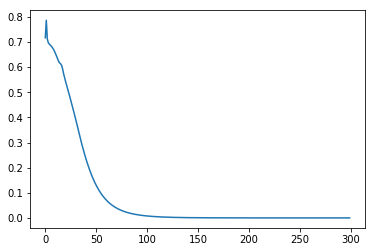

In [27]:
plt.plot(history.history['loss'])
plt.show()

In [28]:
model.evaluate(X,Y)

4/4 [==============================] - 0s 18ms/step


8.679155598656507e-07

<hr>

## MNIST Fashion Dataset --> Multiclass Classification

In [35]:
mnist = keras.datasets.fashion_mnist

In [36]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print(training_images.shape)
print(training_labels.shape)
print("Categorias del dataset: ",np.unique(training_labels))

(60000, 28, 28)
(60000,)
('Categorias del dataset: ', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))


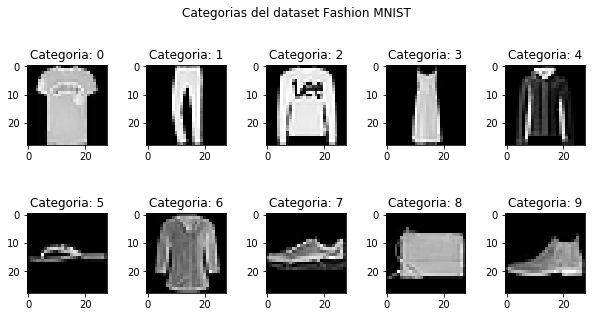

In [37]:
#Despleguemos ejemplos del dataset por categoria

fig = plt.figure(figsize=(10,5))
fig.suptitle("Categorias del dataset Fashion MNIST")
plt.subplots_adjust(wspace=0.5)

for j in range(10): #10 categorias
    for i in range(10000): #60000 ejemplos en el dataset de prueba
        if(test_labels[i] == j):
            plt.subplot(2,5,j+1)
            plt.title("Categoria: "+str(j))
            plt.imshow(test_images[i], cmap='gray')
            break
plt.show()

In [49]:
#Normalizacion de los datos
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [74]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [75]:
optimizer = keras.optimizers.Adam(lr=0.1)

model.compile(optimizer = optimizer,
              loss = 'sparse_categorical_crossentropy')

history = model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.5572
Epoch 2/5
60000/60000 [==============================] - 12s 198us/step - loss: 0.4501
Epoch 3/5
60000/60000 [==============================] - 12s 202us/step - loss: 0.4312
Epoch 4/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.4187
Epoch 5/5
60000/60000 [==============================] - 11s 184us/step - loss: 0.4038


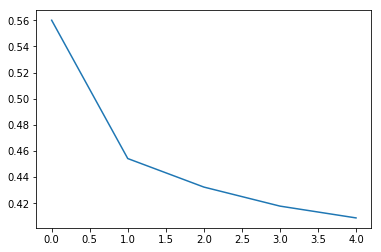

In [65]:
plt.plot(history.history['loss'])
plt.show()

In [66]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 82us/step


0.4620069513082504

<hr>

## Trabajemos

1. ¿Qué desventaja tiene la capa Flatten para la clasificación de imágenes? ¿Funciona el sistema visual humano de esta forma?
2. Evalúe distintos valores de tasa de aprendizaje y discuta su impacto en el entrenamiento y en el error obtenido.
3. Evalúe distintos números de neuronas en la penúltima capa y discuta su impacto en el entrenamiento y en el error obtenido.
4. Evalúe distintos números de capas y neuronas en cada capa y discuta su impacto en el entrenamiento y en el error obtenido.
5. Ingrese una imagen de entrada al modelo ya entrenado e imprima la clase predicha.